In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/beer-servings.csv')
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [ ]:
data.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,185.000000,185.000000,187.000000,192.000000
mean,96.000000,105.124324,83.221622,50.165775,4.741667
std,55.858452,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000
50%,96.000000,76.000000,60.000000,9.000000,4.250000
75%,144.000000,185.000000,132.000000,60.500000,7.200000
max,192.000000,376.000000,438.000000,370.000000,14.400000


In [ ]:
# Outliers of wine services

In [ ]:
#Filling null values with median
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())

In [ ]:
#  Identifying and managing outliers for wine servings using the IQR method.

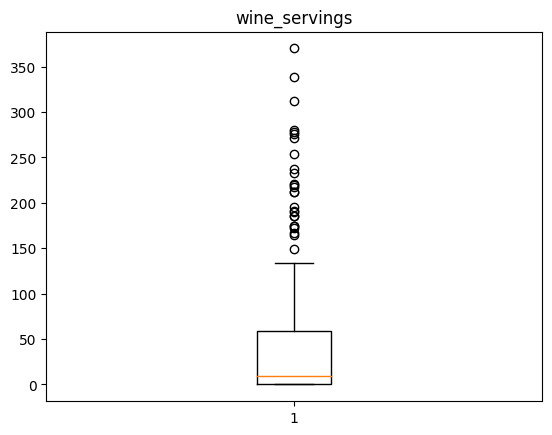

In [ ]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')
plt.show()

In [ ]:
Q1 = np.percentile(data['wine_servings'],25,method='midpoint')
Q2 = np.percentile(data['wine_servings'],50,method='midpoint')
Q3 = np.percentile(data['wine_servings'],75,method='midpoint')

In [ ]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  1.0
Q2 is  9.0
Q3 is  59.0


In [ ]:
IQR = Q3-Q1
IQR

58.0

In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -86.0
upper limit is  146.0


In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
data['wine_servings'] = data['wine_servings'].clip(lower=low_lim , upper=up_lim)

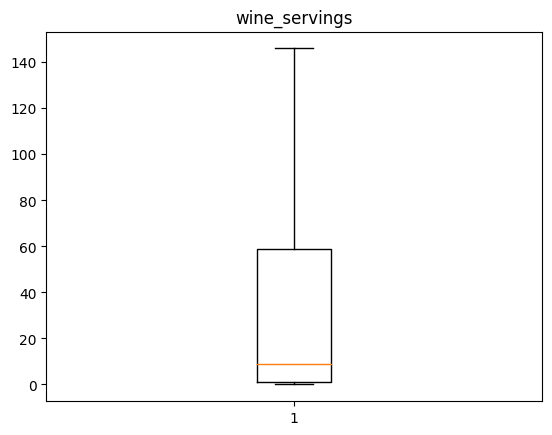

In [ ]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')
plt.show()

In [ ]:
# using z score

In [2]:
from scipy.stats import zscore

In [3]:
data = pd.read_csv('/content/beer-servings.csv')
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [4]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())
data['spirit_servings'] = data['spirit_servings'].fillna(data['spirit_servings'].median())
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol'] = data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())


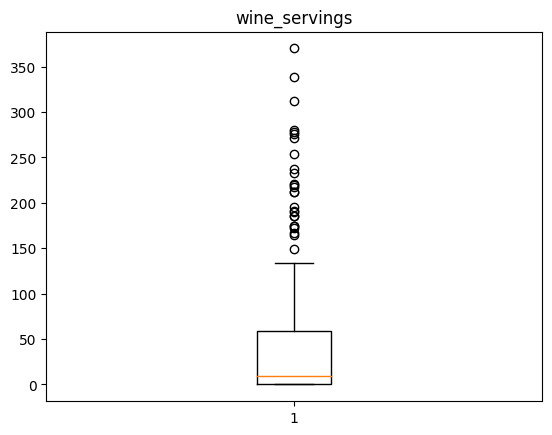

In [ ]:
plt.boxplot(data['wine_servings'])
plt.title('wine_servings')
plt.show()

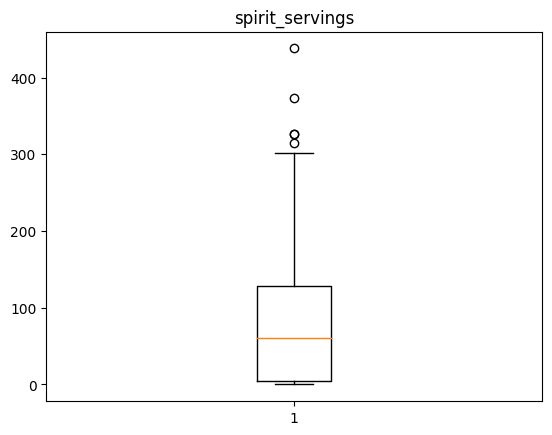

In [ ]:
plt.boxplot(data['spirit_servings'])
plt.title('spirit_servings')
plt.show()

In [8]:
data2=data.copy()
data2.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [9]:
data2['wine_servings_zscores'] = zscore(data2['wine_servings'])
data2.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_zscores
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.617162
1,1,Albania,89.0,132.0,54.0,4.9,Europe,0.064562
2,2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.440419
3,3,Andorra,245.0,138.0,312.0,12.4,Europe,3.321685
4,4,Angola,217.0,57.0,45.0,5.9,Africa,-0.049059


In [11]:
threshold = 2 # z-score beyond 3 or below -3 is an outlier.

In [12]:

wine_outlier = data2[(data2['wine_servings_zscores'] > threshold) | (data2['wine_servings_zscores'] < -threshold)]
wine_outlier

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_zscores
3,3,Andorra,245.0,138.0,312.0,12.4,Europe,3.321685
6,6,Argentina,76.0,25.0,221.0,8.3,South America,2.172855
8,8,Australia,261.0,72.0,212.0,10.4,Oceania,2.059234
16,16,Belgium,295.0,84.0,212.0,10.5,Europe,2.059234
42,42,Croatia,230.0,87.0,254.0,10.2,Europe,2.589464
48,48,Denmark,224.0,81.0,278.0,10.4,Europe,2.892452
55,55,Equatorial Guinea,92.0,0.0,233.0,5.8,Africa,2.324349
61,61,France,127.0,151.0,370.0,11.8,Europe,4.053907
67,67,Greece,133.0,112.0,218.0,8.3,Europe,2.134981
83,83,Italy,85.0,42.0,237.0,6.5,Europe,2.374847


In [13]:
wine_outlier['wine_servings']

3      312.0
6      221.0
8      212.0
16     212.0
42     254.0
48     278.0
55     233.0
61     370.0
67     218.0
83     237.0
99     271.0
136    339.0
156    276.0
166    280.0
185    220.0
Name: wine_servings, dtype: float64

In [18]:
data_without_wine_serings_outlier=data2[(data2['wine_servings_zscores'] < threshold) & (data2['wine_servings_zscores'] > -threshold)]
data_without_wine_serings_outlier.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_zscores
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.617162
1,1,Albania,89.0,132.0,54.0,4.9,Europe,0.064562
2,2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.440419
4,4,Angola,217.0,57.0,45.0,5.9,Africa,-0.049059
5,5,Antigua & Barbuda,102.0,128.0,45.0,4.9,North America,-0.049059


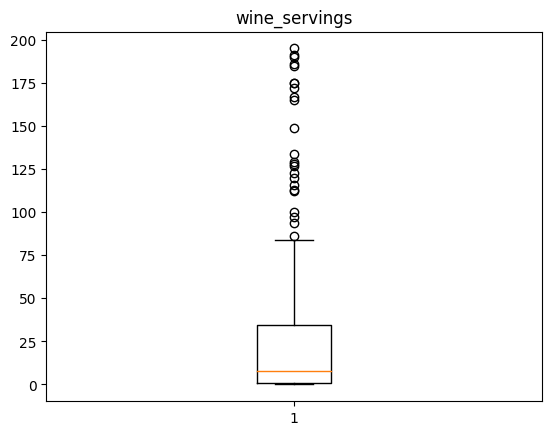

In [19]:
plt.boxplot(data_without_wine_serings_outlier['wine_servings'])
plt.title('wine_servings')
plt.show()

In [ ]:
# spirit_servings

In [20]:
data4=data.copy()
data4.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [21]:
data4['spirit_servings_zscores'] = zscore(data2['spirit_servings'])
data4.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,spirit_servings_zscores
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.943742
1,1,Albania,89.0,132.0,54.0,4.9,Europe,0.570668
2,2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.943742
3,3,Andorra,245.0,138.0,312.0,12.4,Europe,0.639505
4,4,Angola,217.0,57.0,45.0,5.9,Africa,-0.289792


In [22]:
spirit_outlier = data4[(data4['spirit_servings_zscores'] > threshold) | (data4['spirit_servings_zscores'] < -threshold)]
spirit_outlier

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,spirit_servings_zscores
15,15,Belarus,142.0,373.0,42.0,14.4,Europe,3.335613
50,50,Dominica,52.0,286.0,26.0,6.6,North America,2.337479
68,68,Grenada,199.0,438.0,28.0,11.9,North America,4.081345
72,72,Guyana,93.0,302.0,1.0,7.1,South America,2.521044
73,73,Haiti,1.0,326.0,1.0,5.9,North America,2.796391
141,141,Russian Federation,247.0,326.0,73.0,11.5,Asia,2.796391
144,144,St. Lucia,171.0,315.0,71.0,10.1,North America,2.670190
155,155,Slovakia,196.0,293.0,116.0,11.4,Europe,2.417789
169,169,Thailand,99.0,258.0,1.0,6.4,Asia,2.016241


In [23]:
spirit_outlier['spirit_servings']


15     373.0
50     286.0
68     438.0
72     302.0
73     326.0
141    326.0
144    315.0
155    293.0
169    258.0
Name: spirit_servings, dtype: float64

In [24]:
data_without_spirit_serings_outlier=data4[(data4['spirit_servings_zscores'] < threshold) & (data4['spirit_servings_zscores'] > -threshold)]
data_without_spirit_serings_outlier.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,spirit_servings_zscores
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.943742
1,1,Albania,89.0,132.0,54.0,4.9,Europe,0.570668
2,2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.943742
3,3,Andorra,245.0,138.0,312.0,12.4,Europe,0.639505
4,4,Angola,217.0,57.0,45.0,5.9,Africa,-0.289792


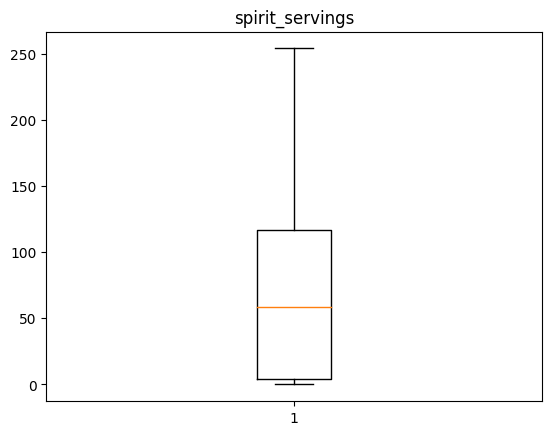

In [25]:
plt.boxplot(data_without_spirit_serings_outlier['spirit_servings'])
plt.title('spirit_servings')
plt.show()


In [ ]:
# As the data is not normally distributed z score technique is not suitable